# Homework 4 writeup solutions

## Name: Dylan Renard

## Problem 1

### Part a

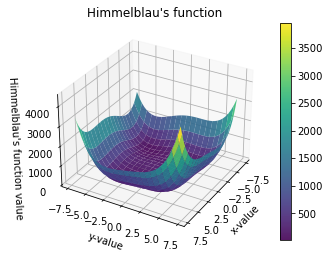

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fxy = lambda x, y: (x**2 + y - 11)**2 + (x + y**2 -7)**2
# First create x
x = np.linspace(-7, 7, 40)
# Now you create y
y = np.linspace(-7, 7, 40)
# Once you have created them, you can uncomment and run the 
# following line of code.
X, Y = np.meshgrid(x, y)

# Setup the figure
fig = plt.figure() # Create a figure
ax = plt.axes(projection='3d')  # Make it a "3D" figure
# Then you do the rest.
surface=ax.plot_surface(X, Y, fxy(X,Y), cmap = 'viridis', linewidth=1, cstride = 2, rstride=2, alpha=0.9,
zorder=1) 
ax.set_zlim([0, 4500])
ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])
ax.set_xlabel('x-value')
ax.set_ylabel('y-value')
ax.set_zlabel("Himmelblau's function value")
ax.set_title("Himmelblau's function")
ax.view_init(30,30)
fig.colorbar(surface)
plt.show()

### Part b

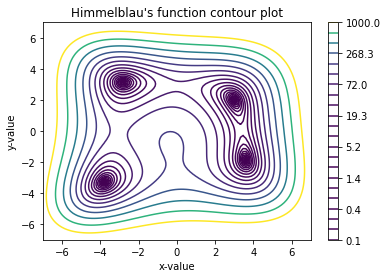

In [25]:
# Once you have defined those then you can create the contour plot with...
# ax2.contour(...) # Fill that in and remove the comment.
fig2, ax2 = plt.subplots() # Create a new figure and axes
# Define the new x, y, and X, and Y from the meshgrid.
x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x,y)
# Once you have defined those then you can create the contour plot with...
contour_plot = ax2.contour(X, Y, fxy(X,Y), np.logspace(-1, 3, 22), cmap = 'viridis') 
ax2.set_xlabel('x-value')
ax2.set_ylabel('y-value')
ax2.set_title("Himmelblau's function contour plot")
fig2.colorbar(contour_plot)

### Part c

Based on the plot again, we can see 4 approximate locations of minima.

In [26]:
import scipy.integrate
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize

f = lambda p: fxy(p[0], p[1])
#gradient & adapter
gradf_xy = lambda x,y: np.array([4*x**3 - 42*x + 4*x*y + 2*y**2 - 14, 4*y**3 - 26*y + 4*x*y + 2*x**2 - 22])
gradf = lambda p: gradf_xy(p[0], p[1])

# first min
p1 = np.array([-3, 3]) # Initial guess

tol = 10**(-7)
for k in range(2000):
    grad = gradf(p1)
    if np.linalg.norm(grad)>tol:
        phi = lambda t: p1 -t*grad
        f_of_phi = lambda t: f(phi(t))
        tmin = scipy.optimize.fminbound(f_of_phi, 0, 1)
        p1 = phi(tmin)
    if np.linalg.norm(grad)<tol:
        break

print(p1)

#second min
p2 = np.array([-4, -3]) # Initial guess
tol = 10**(-7)
for k in range(2000):
    grad = gradf(p2)
    if np.linalg.norm(grad)>tol:
        phi = lambda t: p2 -t*grad
        f_of_phi = lambda t: f(phi(t))
        tmin = scipy.optimize.fminbound(f_of_phi, 0, 1)
    p2 = phi(tmin)
    if np.linalg.norm(grad)<tol:
        break
print(p2)

#third min
p3 = np.array([3, 2]) # Initial guess
tol = 10**(-7)
for k in range(2000):
    grad = gradf(p3)
    if np.linalg.norm(grad)>tol:
        phi = lambda t: p3 -t*grad
        f_of_phi = lambda t: f(phi(t))
        tmin = scipy.optimize.fminbound(f_of_phi, 0, 1)
        p3 = phi(tmin)
    if np.linalg.norm(grad)<tol:
        break
print(p3)

#fourth min
p4 = np.array([3.5, -2]) # Initial guess
tol = 10**(-7)
for k in range(2000):
    grad = gradf(p4)
    if np.linalg.norm(grad)>tol:
        phi = lambda t: p4 -t*grad
        f_of_phi = lambda t: f(phi(t))
        tmin = scipy.optimize.fminbound(f_of_phi, 0, 1)
        p4 = phi(tmin)
    if np.linalg.norm(grad)<tol:
        break
print(p4)

[-2.80511809  3.13131252]
[-3.77931025 -3.28318599]
[3 2]
[ 3.58442834 -1.84812653]


Once we have found the minima, we can plot them.

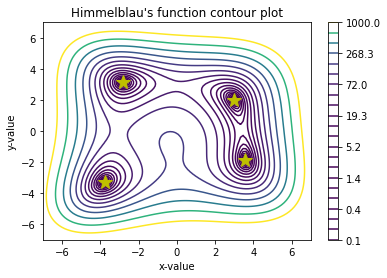

In [27]:
fig2, ax2 = plt.subplots() # Create a new figure and axes
# Define the new x, y, and X, and Y from the meshgrid.
x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x,y)
# Once you have defined those then you can create the contour plot with...
contour_plot = ax2.contour(X, Y, fxy(X,Y), np.logspace(-1, 3, 22), cmap = 'viridis')
ax2.set_xlabel('x-value')
ax2.set_ylabel('y-value')
ax2.set_title("Himmelblau's function contour plot")
ax2.plot(p1[0], p1[1], 'y*', markersize = '15')
ax2.plot(p2[0], p2[1], 'y*', markersize = '15')
ax2.plot(p3[0], p3[1], 'y*', markersize = '15')
ax2.plot(p4[0], p4[1], 'y*', markersize = '15')
fig2.colorbar(contour_plot)
plt.show()


### Part d

[-2.80511809  3.13131252]
[-3.77931025 -3.28318599]
[3 2]
[ 3.58442834 -1.84812653]


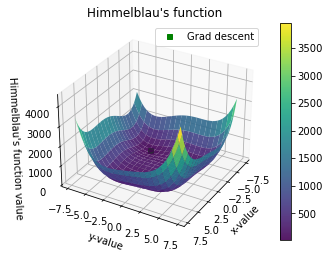

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fxy = lambda x, y: (x**2 + y - 11)**2 + (x + y**2 -7)**2
f = lambda p: fxy(p[0], p[1])
#gradient & adapter
gradf_xy = lambda x,y: np.array([4*x**3 - 42*x + 4*x*y + 2*y**2 - 14, 4*y**3 - 26*y + 4*x*y + 2*x**2 - 22])
gradf = lambda p: gradf_xy(p[0], p[1])
# first min
p1 = np.array([-3, 3]) # Initial guess
tol = 10**(-7)
for k in range(2000):
    grad = gradf(p1)
    if np.linalg.norm(grad)>tol:
        phi = lambda t: p1 -t*grad
        f_of_phi = lambda t: f(phi(t))
        tmin = scipy.optimize.fminbound(f_of_phi, 0, 1)
        p1 = phi(tmin)
    if np.linalg.norm(grad)<tol:
        break
print(p1)

#second min
p2 = np.array([-4, -3]) # Initial guess
tol = 10**(-7)
for k in range(2000):
    grad = gradf(p2)
    if np.linalg.norm(grad)>tol:
        phi = lambda t: p2 -t*grad
        f_of_phi = lambda t: f(phi(t))
        tmin = scipy.optimize.fminbound(f_of_phi, 0, 1)
        p2 = phi(tmin)
    if np.linalg.norm(grad)<tol:
        break
print(p2)
#third min
p3 = np.array([3, 2]) # Initial guess
tol = 10**(-7)
for k in range(2000):
    grad = gradf(p3)
    if np.linalg.norm(grad)>tol:
        phi = lambda t: p3 -t*grad
        f_of_phi = lambda t: f(phi(t))
        tmin = scipy.optimize.fminbound(f_of_phi, 0, 1)
        p3 = phi(tmin)
    if np.linalg.norm(grad)<tol:
        break
print(p3)

#fourth min
p4 = np.array([3.5, -2]) # Initial guess
tol = 10**(-7)
for k in range(2000):
    grad = gradf(p4)
    if np.linalg.norm(grad)>tol:
        phi = lambda t: p4 -t*grad
        f_of_phi = lambda t: f(phi(t))
        tmin = scipy.optimize.fminbound(f_of_phi, 0, 1)
        p4 = phi(tmin)
    if np.linalg.norm(grad)<tol:
        break
print(p4)

# First create x
x = np.linspace(-7, 7, 40)
# Now you create y
y = np.linspace(-7, 7, 40)
# Once you have created them, you can uncomment and run the
# following line of code.
X, Y = np.meshgrid(x, y)
# Setup the figure
fig = plt.figure() # Create a figure
ax = plt.axes(projection='3d',)
surface=ax.plot_surface(X, Y, fxy(X,Y), cmap = 'viridis', linewidth=1, cstride = 2, rstride=2, alpha=0.9,
zorder=1)

ax.set_zlim([0, 4500])
ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])
ax.set_xlabel('x-value')
ax.set_ylabel('y-value')
ax.set_zlabel("Himmelblau's function value")
ax.set_title("Himmelblau's function")
ax.view_init(30,30)
ax.plot(p1[0], p1[1], f(p1), 'y*', markersize = '5')
ax.plot(p2[0], p2[1], f(p2), 'gs', markersize = '5', label = 'Grad descent')
ax.plot(p3[0], p3[1], f(p3), 'y*', markersize = '5')
ax.plot(p4[0], p4[1], f(p4), 'y*', markersize = '5')
ax.legend()
fig.colorbar(surface)
plt.show()

## Problem 2

### Part a

In [29]:
import time # Import the timing algorithm, 
            # we'll see how this works in Week 5.
tol = 1e-9 # Set the tolerance - note that it changes
# Now run gradient descent!
p = np.array([2, 3])
iterations = 0
start = time.time()
for k in range(8000):
    grad = gradf(p)
    if np.linalg.norm(grad)>tol:
        phi = lambda t: p -t*grad
        f_of_phi = lambda t: f(phi(t))
        tmin = scipy.optimize.fminbound(f_of_phi, 0, 1)
        p = phi(tmin)
        iterations = iterations + 1
    if np.linalg.norm(grad)<tol:
        break
end = time.time()
print("The gradient descent algorithm above took " + 
        str(end - start) +
        " seconds and " + 
        str(iterations) + 
        'iterations to complete.') 

The gradient descent algorithm above took 0.004311084747314453 seconds and 16iterations to complete.


### Part b-d

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate
import scipy.optimize
import time
# Tstep = 0.01:

start = time.time()
fxy = lambda x, y: (x**2 + y - 11)**2 + (x + y**2 -7)**2
f = lambda p: fxy(p[0], p[1])
#gradient & adapter
gradf_xy = lambda x,y: np.array([4*x**3 - 42*x + 4*x*y + 2*y**2 - 14, 4*y**3 - 26*y + 4*x*y + 2*x**2 - 22])
gradf = lambda p: gradf_xy(p[0], p[1])
p = np.array([2, 3]) # Initial guess defined in part (e)
tol = 10**(-9) # you need to define tol!
iterations = 0
tstep = 0.01
for k in range(8000):
    grad = gradf(p)
    if np.linalg.norm(grad)>tol:
        p = p - tstep*grad
        iterations = iterations + 1
    if np.linalg.norm(grad)<tol:
        break
end = time.time()
print (iterations, end-start)

# tstep = 0.02:
start = time.time()
fxy = lambda x, y: (x**2 + y - 11)**2 + (x + y**2 -7)**2
f = lambda p: fxy(p[0], p[1])
#gradient & adapter
gradf_xy = lambda x,y: np.array([4*x**3 - 42*x + 4*x*y + 2*y**2 - 14,
 4*y**3 - 26*y + 4*x*y + 2*x**2 - 22])
gradf = lambda p: gradf_xy(p[0], p[1])
p = np.array([2, 3]) # Initial guess defined in part (e)
tol = 10**(-9) # you need to define tol!
iterations = 0
tstep = 0.02
for k in range(8000):
    grad = gradf(p)
    if np.linalg.norm(grad)>tol:
        p = p - tstep*grad
        iterations = iterations + 1
    if np.linalg.norm(grad)<tol:
        break
end = time.time()
print (iterations, end-start)

# tstep = 0.025:
start = time.time()
fxy = lambda x, y: (x**2 + y - 11)**2 + (x + y**2 -7)**2
f = lambda p: fxy(p[0], p[1])
#gradient & adapter
gradf_xy = lambda x,y: np.array([4*x**3 - 42*x + 4*x*y + 2*y**2 - 14, 4*y**3 - 26*y + 4*x*y + 2*x**2 - 22])
gradf = lambda p: gradf_xy(p[0], p[1])
p = np.array([2, 3]) # Initial guess defined in part (e)
tol = 10**(-9) # you need to define tol!
iterations = 0
tstep = 0.025
for k in range(8000):
    grad = gradf(p)
    if np.linalg.norm(grad)>tol:
        p = p - tstep*grad
        iterations = iterations + 1
    if np.linalg.norm(grad)<tol:
        break
end = time.time()
print (iterations, end-start)

81 0.003097057342529297
55 0.0018889904022216797
8000 0.1344902515411377


### Part e - the results

 |             | Number Iterations | Time | Converged (Yes/No) |
 |---          | ---               | ---  |   ---              |
 |tstep = 0.01 | 81      | 0.002025127410888672 |  Yes    |
 |tstep = 0.02 |  55             |  0.00800180435180664    |     Yes               |
 |tstep = 0.025|  8000               |  0.08003640174865723    |        No         |
 |`fminbound`  |  16             |  0.008503913879394531    |         Yes           |
 

### Part f - discussion

- I found that the Gradient descent algorithm did not converge consistently. It did not converge for the tstep method where tstep=0.025. This is likely because, as was shown in class tstep=0.025 was great enough such that is started to switch between maximum and minimum without ever reaching it.

- I found that Gradient Descent converged fastest when tstep = 0.01.

- I found that Gradient Descent converged with the fewest iterations with fminbound.

